<a href="https://colab.research.google.com/github/Nischal2015/machine_learning/blob/linear_regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performing linear regression using various methods

<img align='left' style='padding-right:15px' src='https://miro.medium.com/max/640/1*LEmBCYAttxS6uI6rEyPLMQ.png' height='110px' width='150px'>

*The section below contains various way of applying linear regression. The cells below contains linear regression code applied on a small data set generated using some function.*

In [1]:
# Imports the necessary modules
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Creates the dataset
x = np.linspace(-2,2,300)
y = np.exp(x) + 1.2*x + 0.25
#y = np.sqrt(121-x**2)
#y = 3*x + 15

# Sets the constant value for noise
#np.random.seed(10)

noise = np.random.normal(0, 0.5, x.shape)
y = y + noise
x = x - 5

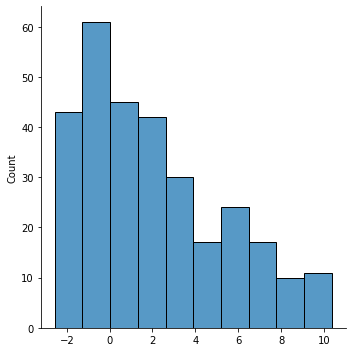

In [3]:
sns.displot(y,)

In [4]:
from sklearn.model_selection import train_test_split

# Splits the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y)

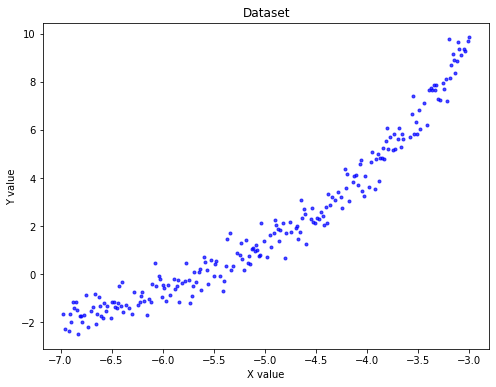

In [5]:
# Plots the training set
plt.figure(figsize=(8,6))
plt.title("Dataset")
plt.xlabel('X value')
plt.ylabel('Y value')
plt.scatter(x_train, y_train, marker='.', color='blue', alpha=0.7)

## Linear Regression Using Least Square Method

<!--NAVIGATION-->
*To understand the least square method please do visit here: [The Least Squares Method](https://docs.google.com/document/d/1vXgizn0Zz5VM_mTEfrRqwydfCyn0OY5DNlkieFLRU68/edit)*

In [6]:
# Regression model
def regression(x,y):
  n = len(x)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_s_squared = np.sum(np.square(x))
  sum_xy = np.sum(x*y)

  # Slope
  m = (n*sum_xy - sum_x*sum_y)/(n*sum_s_squared - sum_x**2)
  # y-intercept
  c = (sum_y - m*sum_x)/n

  return m, c

# Function to calculate squared error
def mean_squared_error(actual, observed):
  return np.sum((actual-observed)**2)/len(actual)

# Function to calculate r-squared
def r_squared(actual, observed):
  var_mean = np.var(actual)
  var_fit = mean_squared_error(actual, observed)/len(actual)
  return (var_mean-var_fit) / var_mean

# Cost function for gradient descent
def cost_function(actual, observed):
  return 1/2*mean_squared_error(actual, observed)

In [7]:
# Calling the module
slope, intercept = regression(x_train,y_train)
print("slope:",slope,"    intercept:",intercept)

# Array of predictions
y_guess_train = slope*x_train + intercept
y_guess_test = slope*x_test + intercept

# Calculates the squared error
print("\nTraining MSE:", mean_squared_error(y_train, y_guess_train))
print("Testing MSE:", mean_squared_error(y_test, y_guess_test))

# Calculates R-squared
print("\nTraining R-squared:", r_squared(y_train, y_guess_train))
print("Testing R-squared:", r_squared(y_test, y_guess_test))

## Prints the correlation coefficient
#print(np.corrcoef(y, y_guess))

# Calculates the cost function (mean squared deviation)
#print("Cost function:", cost_function(y, y_guess))

slope: 2.6918496452367484     intercept: 15.551314890667019

Training MSE: 0.9222505922140678
Testing MSE: 0.830218158701349

Training R-squared: 0.9996221200561205
Testing R-squared: 0.9988570846145512


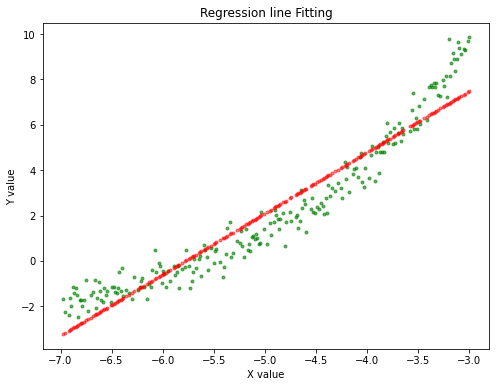

In [8]:
plt.figure(figsize=(8, 6))
plt.title("Regression line Fitting")
plt.xlabel('X value')
plt.ylabel('Y value')
plt.scatter(x_train, y_train, marker='.', color='g', alpha=0.6)
#plt.scatter(x_test, y_test, marker='.', color='r')
plt.scatter(x_train, y_guess_train, marker='.', color='r', alpha=0.5)

## Linear Regression using Matrix Multiplication 

In [9]:
# Linear Regression using matrix multiplication
X = np.column_stack((np.ones(x_train.shape), x_train))
w = np.empty(X.ndim)

<br> 
*The cell below calculates the parameter $\theta$ = $\begin{bmatrix}m\\ c \end{bmatrix}$ using normal equation*
$$\theta = (X^TX)^{-1}X^TY = X^+Y$$
<br>
*where,*<br>
$$X^+ = (X^TX)^{-1}X^T$$
<br>*is called the pseudo-inverse of $X$.*

In [10]:
y_train = np.array(y_train)
theta = np.linalg.pinv(X)@y_train[:, np.newaxis]
theta

array([[15.55131489],
       [ 2.69184965]])

In [11]:
Y_train_pred = X @ theta
Y_test_pred = np.column_stack((np.ones(x_test.shape), x_test)) @ theta
train_error = mean_squared_error(y_train, Y_train_pred.flatten())
test_error = mean_squared_error(y_test, Y_test_pred.flatten())
print("Training error:", train_error)
print("Test error:", test_error)

Training error: 0.922250592214068
Test error: 0.8302181587013483


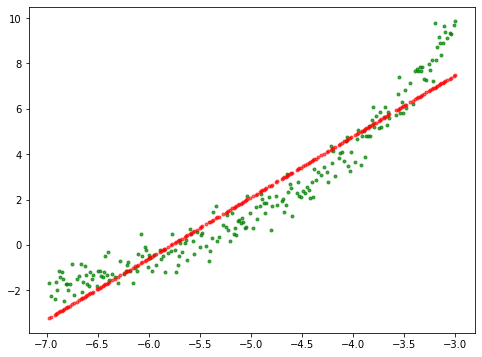

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train, marker='.', color='g', alpha=0.7)
plt.scatter(x_train, Y_train_pred, marker='.', color='r', alpha=0.6)

## Linear Regression Using Gradient Descent

In [34]:
def gradient_descent(x_train, y_train, alpha, no_of_iterations):
  x_train, y_train = x_train.reshape(-1,1), y_train.reshape(-1,1)
  m, n = x_train.shape
  theta = np.zeros(n+1).reshape(n+1, 1)
  cost = np.empty(no_of_iterations)
  x_train = np.column_stack((np.ones(m), x_train))
  for i in range(no_of_iterations):
    hyp = x_train @ theta
    error = hyp - y_train
    theta = theta - 1/m*alpha * (x_train.T @ error)
    cost[i] = cost_function(y_train, hyp)

  return theta, cost

theta, cost = gradient_descent(x_train, y_train, 0.001, 1000000)
y_hat = np.column_stack((np.ones(x_train.shape),x_train.reshape(-1,1))) @ theta

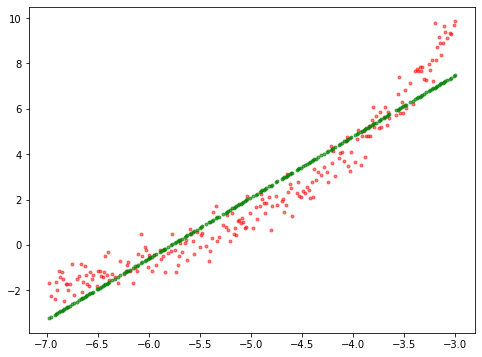

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train, marker='.', color='r', alpha=0.5)
plt.scatter(x_train, y_hat, marker='.', color='g', alpha=0.6)  

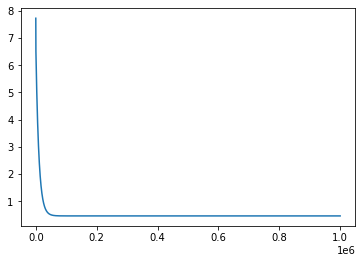

In [36]:
# Plots the cost function vs number of iterations
plt.plot(np.array(range(1,1000001)), cost)

## <p style='color:red'>The contour plot (which of course doesn't look like so) needs to be fixed.</p>

In [20]:
# from mpl_toolkits import mplot3d
# ax = plt.axes(projection='3d')
# theta0 = np.linspace(-1,1,200)
# theta1 = np.linspace(0,2,200)
# X, Y = np.meshgrid(theta0, theta1)
# cost_z = cost[0::500]
# COST_Z = np.tile(cost_z, (len(cost_z), 1))

# ax.plot_surface(X, Y, COST_Z, rstride=1, cstride=1,
#                 cmap='hot', edgecolor='none')
# ax.set_title('surface');